In [69]:
#importar librerias 
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

In [70]:
#lectura de dataframe
df = pd.read_csv("properatti.csv")
df.head()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


In [71]:
#descripción de dataframe
df.describe()


,Unnamed: 0,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,121220.000000,1.025030e+05,69670.000000,69670.000000,1.008100e+05,1.008100e+05,1.008100e+05,81892.000000,101313.000000,68617.000000,8.765800e+04,7899.000000,47390.000000,1.426200e+04
mean,60609.500000,3.574442e+06,-34.626210,-59.266290,4.685259e+05,4.229397e+06,2.397006e+05,233.795328,133.050181,2160.086916,6.912216e+03,17.452336,3.080840,5.009234e+03
std,34993.344153,3.541306e+05,1.980936,2.299922,2.260101e+06,6.904714e+06,3.913239e+05,1782.222147,724.351479,2759.288621,2.837864e+04,120.243621,1.860773,1.204403e+05
min,0.000000,3.427208e+06,-54.823985,-75.678931,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.600000,1.510204e+00,1.000000,1.000000,1.000000e+00
25%,30304.750000,3.430234e+06,-34.669065,-58.727040,1.100000e+05,1.583309e+06,8.973388e+04,50.000000,45.000000,1218.181818,1.550000e+03,1.000000,2.000000,1.000000e+03
50%,60609.500000,3.433910e+06,-34.597985,-58.480128,1.850000e+05,2.558452e+06,1.450000e+05,84.000000,75.000000,1800.000000,2.213115e+03,3.000000,3.000000,2.000000e+03
75%,90914.250000,3.836668e+06,-34.441299,-58.395908,4.200000e+05,4.675792e+06,2.650000e+05,200.000000,150.000000,2486.411765,3.355549e+03,6.000000,4.000000,4.000000e+03
max,121219.000000,6.948895e+06,4.545843,-53.733330,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,187000.000000,206333.333333,4.000000e+06,3150.000000,32.000000,1.000150e+07


In [72]:
#información del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  121220 non-null  int64  
 1   operation                   121220 non-null  object 
 2   property_type               121220 non-null  object 
 3   place_name                  121197 non-null  object 
 4   place_with_parent_names     121220 non-null  object 
 5   country_name                121220 non-null  object 
 6   state_name                  121220 non-null  object 
 7   geonames_id                 102503 non-null  float64
 8   lat-lon                     69670 non-null   object 
 9   lat                         69670 non-null   float64
 10  lon                         69670 non-null   float64
 11  price                       100810 non-null  float64
 12  currency                    100809 non-null  object 
 13  price_aprox_lo

In [73]:
#tamaño del dataframe 
df.shape

(121220, 26)

<AxesSubplot:>

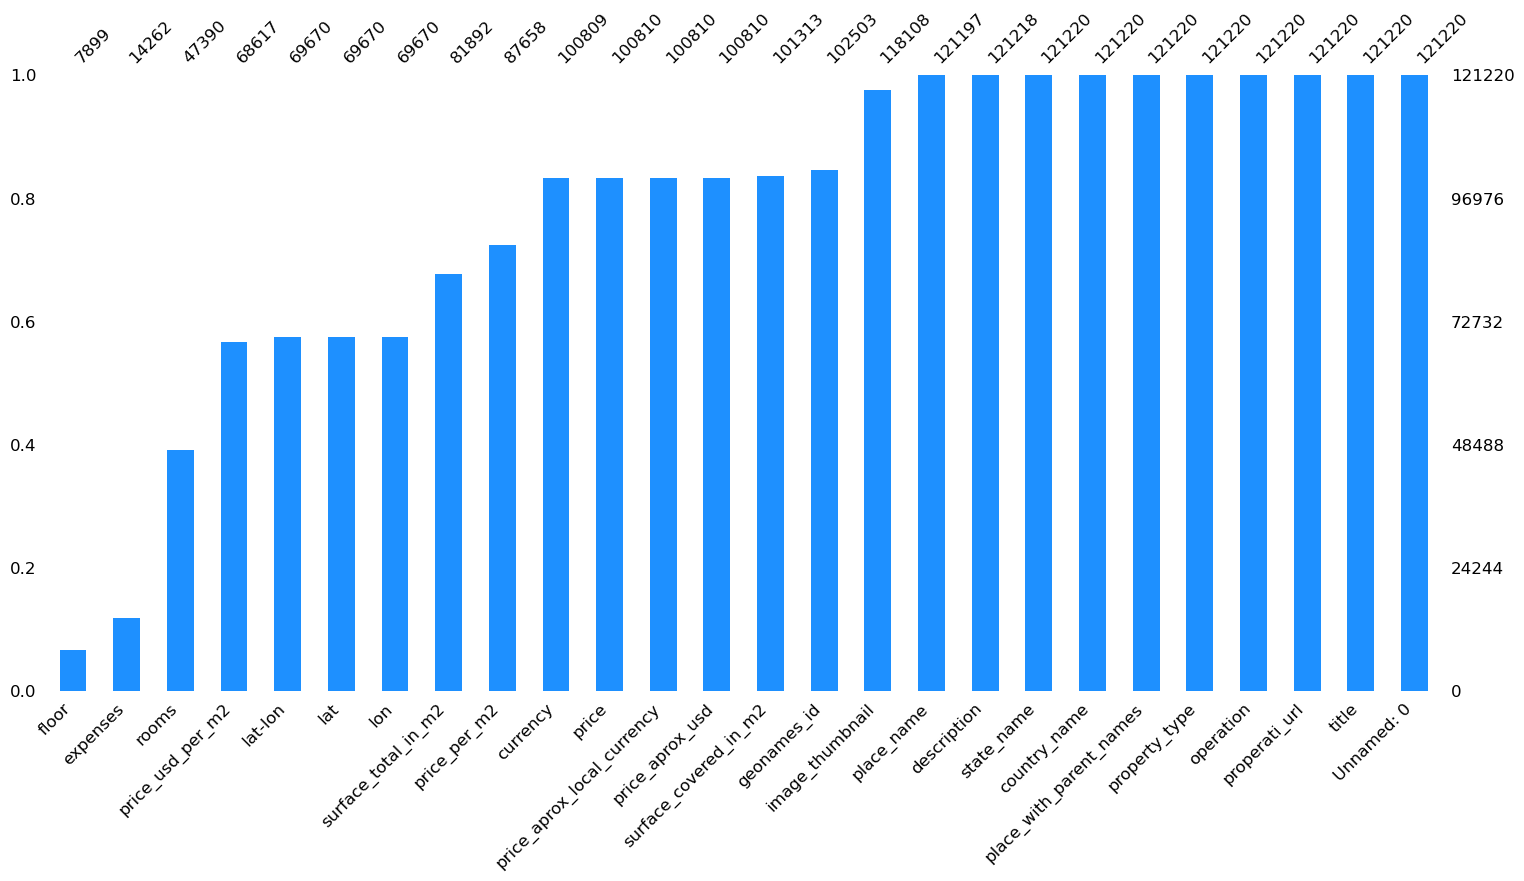

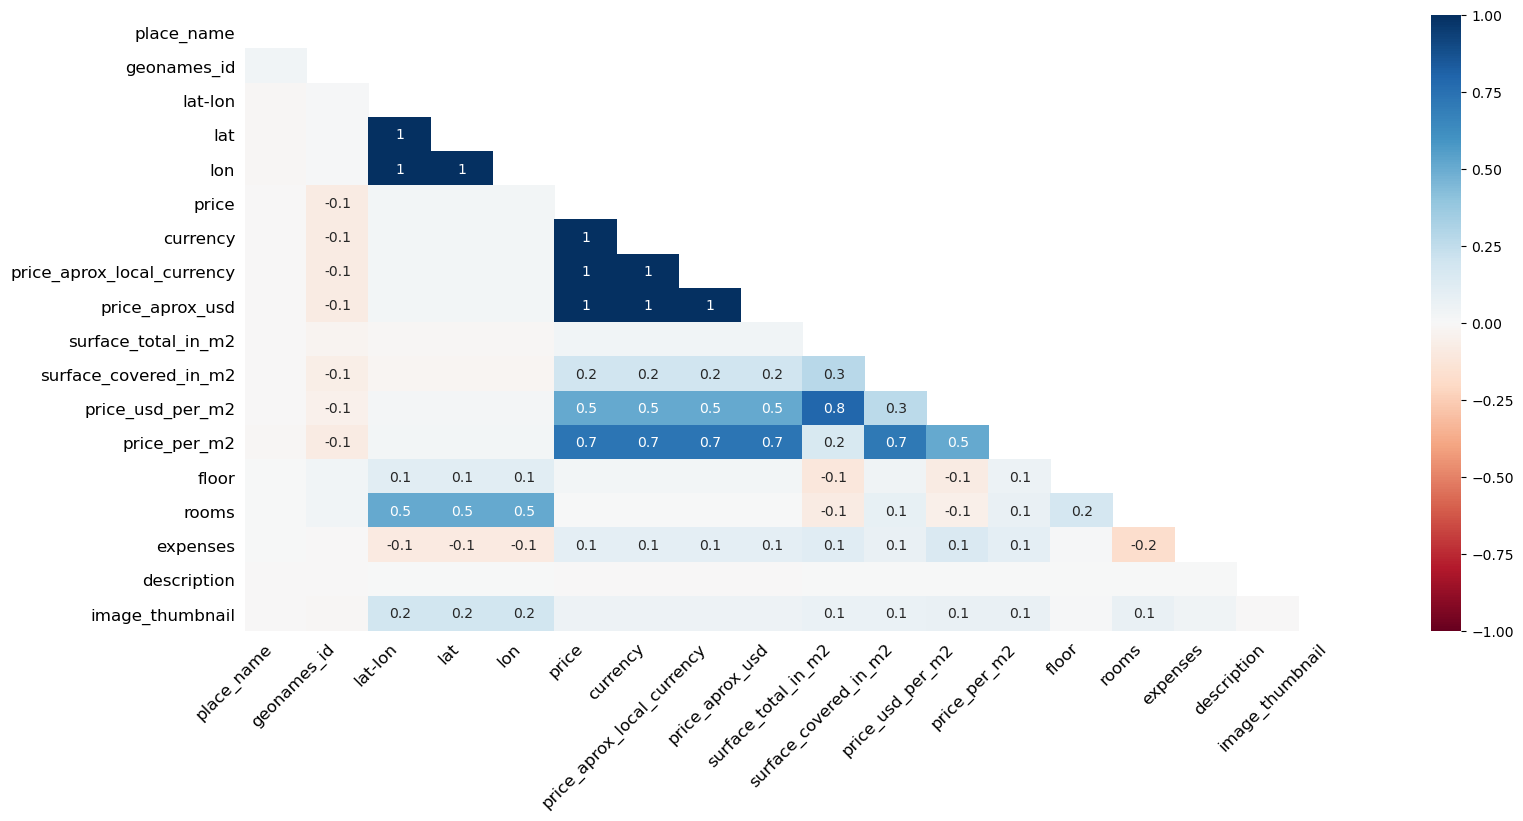

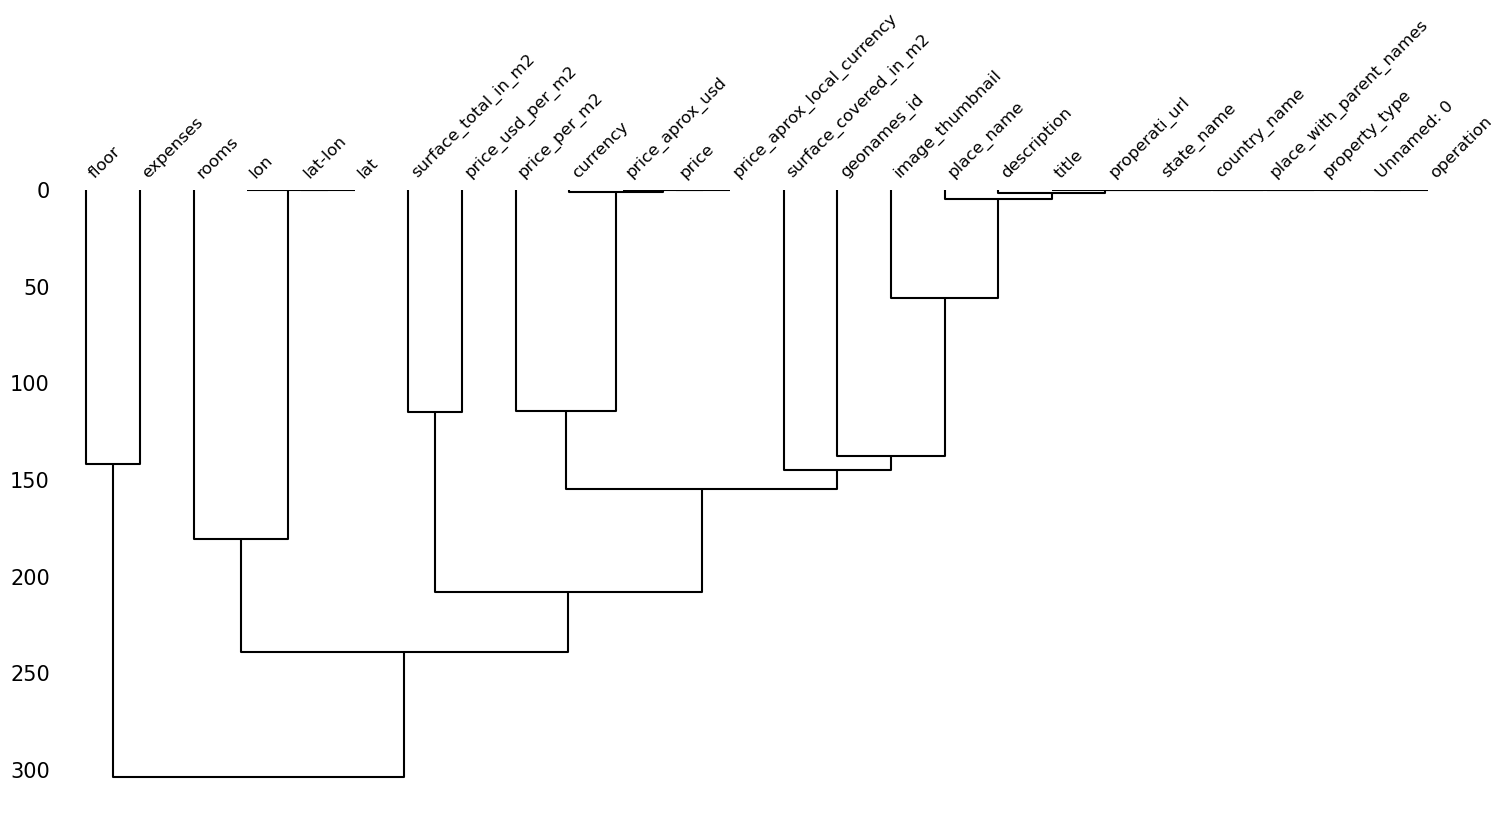

In [74]:
#visualización de datos nulos

df.isna().sum()

msno.bar(df, color="dodgerblue", sort="ascending", fontsize=12, figsize=(18,8)) # gráfico simple donde cada barra representa una columna dentro del marco de datos. La altura de la barra indica qué tan completa está esa columna, es decir, cuántos valores no nulos están presentes
msno.heatmap(df, fontsize=12, figsize=(18,8)) #el mapa de calor se puede utilizar para identificar si existe una relación en presencia de valores nulos entre cada una de las columnas
msno.dendrogram(df, fontsize=12, figsize=(18,8))

In [75]:
df.isnull().sum()

Unnamed: 0                         0
operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
dtype: int64

In [76]:
#Teniendo en Cuenta los análisis anteriores, se opta por eliminar las siguientes columnas:

#Categoricas (practicamente todas las observaciones son diferentes) 1) Unnamed: 0 2) operation3) place_with_parent_names	
#4) properati_url5) description	6) title7) image_thumbnail 8) country_name (todas las observaciones son de Argentina)

#Cuantitativas con muy pocos datos (<40%) 9) floor 10) expenses


In [77]:
df.drop(["Unnamed: 0", "geonames_id", "properati_url", "title",  "image_thumbnail", "expenses"], axis=1, inplace=True)

In [78]:
#visualización df_1
df.head()

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,description
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,..."
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,Venta de departamento en décimo piso al frente...
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...
3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,1676227.5,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,PH 3 ambientes con patio. Hay 3 deptos en lote...
4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,USD,1129248.0,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,NaN,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...


In [79]:
#eliminación de columnas correlacionadas: en la matriz de confusion que la siguientes columnas que son del precio de la vivienda 
#esta relacionadas totalmente , por esto para que el modelo futuro nos quede mejor se decir elimanr price,price_aprox_local_currency
#dejando price_aprox_usd que es una modela mas estable y mundial

In [80]:
df.drop(["price_aprox_local_currency","price_per_m2","price_aprox_usd","lat-lon", "price_usd_per_m2"], axis=1, inplace=True)

In [81]:
# Analizaremos las columnas una por una para verificar  datos nulos 
# columna place_name como son solo 23 y no hay forma de correlacionarlo los eliminaremos

In [82]:
mask_isna = df.place_name.isna() == False
df = df[mask_isna]

In [83]:
# columna currency que significa divisa y la divisa del df es usd reemplazaremos esos datos nullos por usd

In [84]:
df["currency"] = df["currency"].fillna("USD")


In [85]:
df.isna().sum()

operation                       0
property_type                   0
place_name                      0
place_with_parent_names         0
country_name                    0
state_name                      0
lat                         51550
lon                         51550
price                       20410
currency                        0
surface_total_in_m2         39323
surface_covered_in_m2       19907
floor                      113298
rooms                       73815
description                     2
dtype: int64

In [86]:
#Eliminaremos los datos nulos del la columna price_usd_per_m2 

In [87]:
mask_isna = df.price.isna() == False
df = df[mask_isna]

In [88]:
df.isna().sum()

operation                      0
property_type                  0
place_name                     0
place_with_parent_names        0
country_name                   0
state_name                     0
lat                        42262
lon                        42262
price                          0
currency                       0
surface_total_in_m2        31939
surface_covered_in_m2      13150
floor                      93871
rooms                      61216
description                    2
dtype: int64

In [89]:
#obervación al eliminar los isna de price_usd_per_m2 se eliminaron por completo los datos isna de surface_total_in_m2
# y la gran mayotia de surface_covered_in_m2 ; esto indica que estaban directamente relacionados

In [90]:
#continuaremos eliminando los datos isna de la columna surface_covered_in_m2  

In [91]:
mask_isna = df.surface_covered_in_m2.isna() == False
df = df[mask_isna]

In [92]:
df.isna().sum()

operation                      0
property_type                  0
place_name                     0
place_with_parent_names        0
country_name                   0
state_name                     0
lat                        36522
lon                        36522
price                          0
currency                       0
surface_total_in_m2        24303
surface_covered_in_m2          0
floor                      81180
rooms                      51510
description                    1
dtype: int64

In [93]:
#Visalización de datos atipicos del nuevo data

<function matplotlib.pyplot.show(close=None, block=None)>

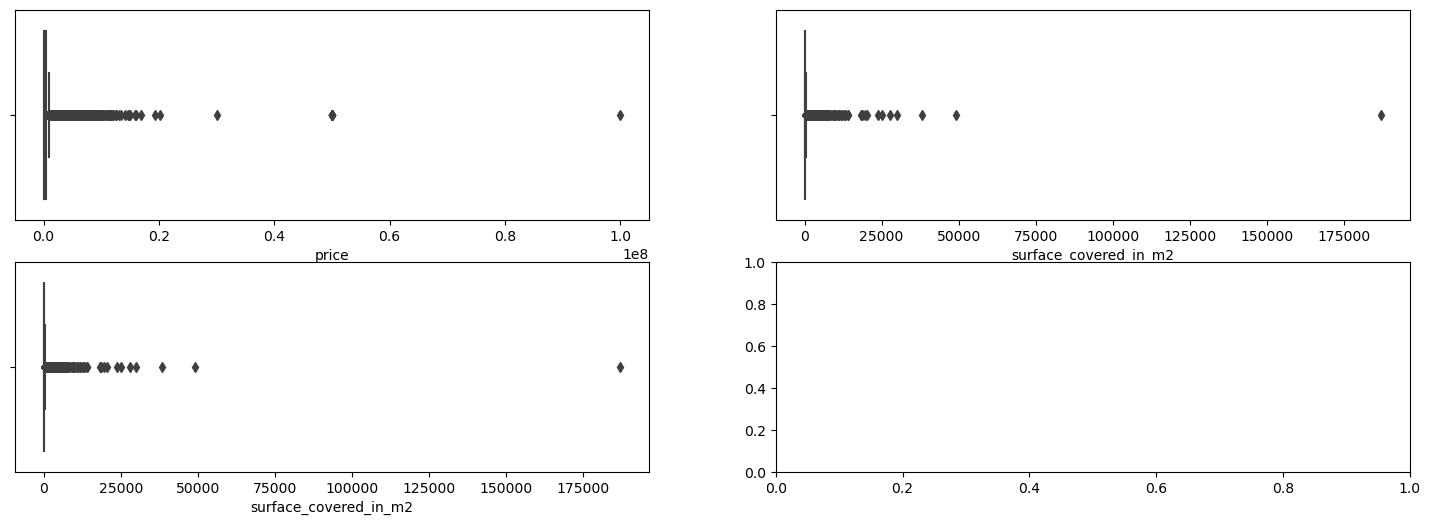

In [94]:
import seaborn as sns
fig, axes = plt.subplots(2, 2, figsize = (18,6))
sns.boxplot(x=df["price"], ax=axes[0,0])
sns.boxplot(x=df["surface_covered_in_m2"], ax=axes[0,1])
sns.boxplot(x=df["surface_covered_in_m2"], ax=axes[1,0])
plt.show

In [95]:
#Eliminación de datos atipicos en la columna price_usd_per_m2

In [96]:
mask_precio_m2 = df.price<= 5023  # con esta mascara se eliminan 873 observaciones
mask_isna_precio_m2 = df.price.isna() == True
df_precio_sin_outlier = df[mask_precio_m2 | mask_isna_precio_m2]
print("El tamaño DataFrame despues de eliminar los outlier es: ",df_precio_sin_outlier.shape)



El tamaño DataFrame despues de eliminar los outlier es:  (2, 15)


In [97]:
#Analisis de cuartiles para precio en USD por m2


Q1_precio_usdm2 = df["price"].quantile(0.25)
Q3_precio_usdm2 = df["price"].quantile(0.75)
print("los cuartiles para para precio en USD por m2 son: ", round(Q1_precio_usdm2), round(Q3_precio_usdm2))

IQR_pusd = Q3_precio_usdm2-Q1_precio_usdm2 

lim_inf_pusd = Q1_precio_usdm2  - 2*IQR_pusd
lim_sup_pusd = Q3_precio_usdm2 + 2*IQR_pusd

print("Los limites para para precio en USD por m2 son: ", round(lim_inf_pusd), round(lim_sup_pusd))

los cuartiles para para precio en USD por m2 son:  112000 413309
Los limites para para precio en USD por m2 son:  -490618 1015927


In [98]:

#fig, axes = plt.subplots(1, 2, figsize = (12,6))

#s_p = sns.histplot(data=df_5, x = 'surface_covered_in_m2', hue= 'property_type', ax=axes[0])
#s_p.set(xlim = (0, 1000))

#p_p = sns.histplot(data=df_5, x = 'price', hue='property_type', ax=axes[1])
#p_p.set(xlim = (0, 10000))

In [99]:
# Revisamos el porcentaje de propiedades que hay en cada región.
state_name_mix = (df["state_name"].value_counts()/len(df)).reset_index()
state_name_mix['state_name'] = (state_name_mix['state_name']*100).round(1) 
state_name_mix.columns = ['state_name', 'mix']
state_name_mix

,state_name,mix
0,Capital Federal,31.2
1,Bs.As. G.B.A. Zona Norte,25.7
2,Bs.As. G.B.A. Zona Sur,11.3
3,Buenos Aires Costa Atlántica,7.9
4,Córdoba,7.4
5,Bs.As. G.B.A. Zona Oeste,7.1
6,Santa Fe,5.3
7,Buenos Aires Interior,1.6
8,Mendoza,0.5
9,Corrientes,0.5


In [100]:
# Graficamos la cantidad de propiedades por provincia

fig = px.bar(data_frame = state_name_mix[state_name_mix["mix"] >1.8], x='state_name' , y='mix', text='mix' , width=500, height=500)

fig.update_layout(
    title='<b>Propiedades por Provincia</b>',
    xaxis_tickfont_size=10,
    yaxis=dict(title='% del total',titlefont_size=14,tickfont_size=10),
    title_x=0.5)
fig.update_traces(textposition='inside', textangle = 0, insidetextanchor='middle')

fig.show()

In [101]:
# Revisamos el porcentaje de propiedades que hay por tipo.

property_type_mix = (df["property_type"].value_counts()/len(df)).reset_index()
property_type_mix['property_type'] = (property_type_mix['property_type']*100).round(1)
property_type_mix.columns = ['property_type', 'mix']
property_type_mix


,property_type,mix
0,apartment,59.6
1,house,32.3
2,PH,5.2
3,store,2.9


In [102]:
# Graficamos el porcentaje por tipo de propiedad que hay en el DataFrame

fig = px.bar(data_frame= property_type_mix, x='property_type' , y='mix', text = 'mix'  , width=500, height=500)

fig.update_layout(
    title='<b>Propiedades por Tipo</b>',
    xaxis_tickfont_size=10,
    yaxis=dict(title='% del total',titlefont_size=14,tickfont_size=10),
    title_x=0.5)
fig.update_traces(textposition='inside', textangle = 0, insidetextanchor='middle')
fig.show()

In [103]:
# Revisamos la composición del mix de propiedades dentro de cada provincia.

state_y_type_mix = (df.groupby(['state_name', 'property_type'])['operation'].count() / df.groupby(['state_name'])['operation'].count()).reset_index()
state_y_type_mix['operation'] = (state_y_type_mix['operation']*100).round(1)
state_y_type_mix

,state_name,property_type,operation
0,Bs.As. G.B.A. Zona Norte,PH,4.0
1,Bs.As. G.B.A. Zona Norte,apartment,41.4
2,Bs.As. G.B.A. Zona Norte,house,52.5
3,Bs.As. G.B.A. Zona Norte,store,2.1
4,Bs.As. G.B.A. Zona Oeste,PH,10.1
...,...,...,...
83,Tierra Del Fuego,store,7.7
84,Tucumán,PH,1.0
85,Tucumán,apartment,75.5
86,Tucumán,house,20.4


In [104]:
# Graficamos este mix de tipo de propiedades por provincia

fig = px.bar(data_frame= state_y_type_mix, x='state_name' , y='operation', color ='property_type',  text='operation'  , width=1100, height=500)

fig.update_layout(
    title='<b>Propiedades por Provincia y Tipo</b>',
    xaxis_tickfont_size=10,
    yaxis=dict(title='% del total',titlefont_size=14,tickfont_size=10),
    title_x=0.5)
fig.update_traces(textposition='inside', textangle = 0, insidetextanchor='middle')
fig.update_layout(uniformtext_minsize=9, uniformtext_mode='hide')
fig.show()

In [105]:
# Podemos observar, que una columna contiene el pais, la provincia, la ciudad/barrio, etc. en una misma serie

df['place_with_parent_names'].value_counts(dropna=False)

|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|                      4327
|Argentina|Santa Fe|Rosario|                                                4059
|Argentina|Córdoba|Córdoba|                                                 3347
|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nordelta|                         2790
|Argentina|Capital Federal|Belgrano|                                        2407
                                                                            ... 
|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|Barrio Cerrado "Villa Rosa"|         1
|Argentina|Córdoba|Villa Amancay|                                              1
|Argentina|Córdoba|Monte Cristo|                                               1
|Argentina|Mendoza|Malargüe|                                                   1
|Argentina|Bs.As. G.B.A. Zona Sur|Florencio Varela|Ingeniero Juan Allan|       1
Name: place_with_parent_names, Length: 1004, dtype: int64

In [106]:
# Vamos a proceder separar esta información en una nueva columna que incorporamos al DataFrame

df['info_varia_geo']=df['place_with_parent_names'].apply(lambda x: x.split(sep='|', maxsplit=-1))

In [107]:
# Vamos a crear 3 nuevas columnas con esta información nueva: País, Provincia y ciudad/barrio

df['pais']=df['info_varia_geo'].apply(lambda x: x[1])
df['prov']=df['info_varia_geo'].apply(lambda x: x[2])
df['barrio/ciudad']=df['info_varia_geo'].apply(lambda x: x[3])

In [108]:
# Observamos como queda el DataFrame hasta el momento


df.head()

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,lat,lon,price,currency,surface_total_in_m2,surface_covered_in_m2,floor,rooms,description,info_varia_geo,pais,prov,barrio/ciudad
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,55.0,40.0,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...","[, Argentina, Capital Federal, Mataderos, ]",Argentina,Capital Federal,Mataderos
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,-34.652262,-58.522982,72000.0,USD,55.0,55.0,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,"[, Argentina, Capital Federal, Mataderos, ]",Argentina,Capital Federal,Mataderos
4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,-38.002626,-57.549447,64000.0,USD,35.0,35.0,NaN,NaN,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,"[, Argentina, Buenos Aires Costa Atlántica, Ma...",Argentina,Buenos Aires Costa Atlántica,Mar del Plata
6,sell,PH,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,Bs.As. G.B.A. Zona Norte,-34.532957,-58.521782,130000.0,USD,106.0,78.0,NaN,NaN,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,"[, Argentina, Bs.As. G.B.A. Zona Norte, Vicent...",Argentina,Bs.As. G.B.A. Zona Norte,Vicente López
7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,-34.559873,-58.443362,138000.0,USD,45.0,40.0,NaN,NaN,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,"[, Argentina, Capital Federal, Belgrano, ]",Argentina,Capital Federal,Belgrano


In [109]:
#Para evaluar el modelo decidimos filtrar en la columna .property_type el item de apartament y en la columna pro el item Capital federal

In [110]:
mask_property_type = df.property_type == "apartment"  # elegimos apar
df = df[mask_property_type]


In [111]:
df.corr()

,lat,lon,price,surface_total_in_m2,surface_covered_in_m2,floor,rooms
lat,1.000000,-0.334838,0.163651,0.014911,0.000750,-0.015547,0.047528
lon,-0.334838,1.000000,-0.158888,-0.011615,-0.002612,0.033894,-0.024284
price,0.163651,-0.158888,1.000000,0.016143,0.010000,-0.007387,0.154462
surface_total_in_m2,0.014911,-0.011615,0.016143,1.000000,0.012575,0.006551,0.032447
surface_covered_in_m2,0.000750,-0.002612,0.010000,0.012575,1.000000,-0.006083,0.104335
floor,-0.015547,0.033894,-0.007387,0.006551,-0.006083,1.000000,0.055210
rooms,0.047528,-0.024284,0.154462,0.032447,0.104335,0.055210,1.000000


In [112]:
df.head()

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,lat,lon,price,currency,surface_total_in_m2,surface_covered_in_m2,floor,rooms,description,info_varia_geo,pais,prov,barrio/ciudad
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,-34.652262,-58.522982,72000.0,USD,55.0,55.0,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,"[, Argentina, Capital Federal, Mataderos, ]",Argentina,Capital Federal,Mataderos
4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,-38.002626,-57.549447,64000.0,USD,35.0,35.0,NaN,NaN,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,"[, Argentina, Buenos Aires Costa Atlántica, Ma...",Argentina,Buenos Aires Costa Atlántica,Mar del Plata
7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,-34.559873,-58.443362,138000.0,USD,45.0,40.0,NaN,NaN,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,"[, Argentina, Capital Federal, Belgrano, ]",Argentina,Capital Federal,Belgrano
8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,-34.559873,-58.443362,195000.0,USD,65.0,60.0,NaN,NaN,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"[, Argentina, Capital Federal, Belgrano, ]",Argentina,Capital Federal,Belgrano
12,sell,apartment,Martínez,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,-34.486019,-58.503814,115000.0,USD,39.0,36.0,NaN,NaN,EXCELENTE DEPARTAMENTO 2 AMBIENTES CONTRAFRENT...,"[, Argentina, Bs.As. G.B.A. Zona Norte, San Is...",Argentina,Bs.As. G.B.A. Zona Norte,San Isidro


In [113]:
mask_prov = (df.prov == "Capital Federal") & (df['barrio/ciudad'] == "Palermo")    # elegimos apar
df_caba = df[mask_prov]

In [114]:
df_caba.head()

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,lat,lon,price,currency,surface_total_in_m2,surface_covered_in_m2,floor,rooms,description,info_varia_geo,pais,prov,barrio/ciudad
13,sell,apartment,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,NaN,NaN,111700.0,USD,50.0,30.0,NaN,1.0,Torre I Mondrian. 3 ambientes con terraza y d...,"[, Argentina, Capital Federal, Palermo, Palerm...",Argentina,Capital Federal,Palermo
14,sell,apartment,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,NaN,NaN,147900.0,USD,42.0,31.0,NaN,1.0,Torre II Dalí. Ambiente unico divisible.Vitrau...,"[, Argentina, Capital Federal, Palermo, Palerm...",Argentina,Capital Federal,Palermo
19,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,-34.580504,-58.405874,350000.0,USD,104.0,96.0,NaN,3.0,Excelente semipiso al contra frente en Bulnes ...,"[, Argentina, Capital Federal, Palermo, ]",Argentina,Capital Federal,Palermo
21,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,-34.590926,-58.411665,270500.0,USD,118.0,73.0,NaN,4.0,"EXCELENTE ZONA, MULTIPLES MEDIOS DE TRANSPORTE...","[, Argentina, Capital Federal, Palermo, ]",Argentina,Capital Federal,Palermo
241,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,-34.588862,-58.412307,147300.0,USD,39.0,35.0,NaN,1.0,IMPECABLE TORRE COY III – DEPARTAMENTO DE UN A...,"[, Argentina, Capital Federal, Palermo, ]",Argentina,Capital Federal,Palermo


In [115]:
# Normalización de datos

In [116]:
df_caba = df_caba.loc[:, ['surface_total_in_m2', 'surface_covered_in_m2', 'price','lat','lon']]

In [117]:
df_caba.head(10)

,surface_total_in_m2,surface_covered_in_m2,price,lat,lon
13,50.0,30.0,111700.0,NaN,NaN
14,42.0,31.0,147900.0,NaN,NaN
19,104.0,96.0,350000.0,-34.580504,-58.405874
21,118.0,73.0,270500.0,-34.590926,-58.411665
241,39.0,35.0,147300.0,-34.588862,-58.412307
256,175.0,175.0,440000.0,-34.566479,-58.434075
266,47.0,41.0,135000.0,-34.576504,-58.431468
282,NaN,153.0,770000.0,NaN,NaN
386,70.0,61.0,179000.0,-34.590243,-58.436402
443,NaN,175.0,379900.0,-34.584641,-58.411582


In [118]:
df_caba.dropna(inplace=True)

In [119]:
df_caba = pd.get_dummies(df_caba, drop_first=True)

In [120]:
df_caba.head()

,surface_total_in_m2,surface_covered_in_m2,price,lat,lon
19,104.0,96.0,350000.0,-34.580504,-58.405874
21,118.0,73.0,270500.0,-34.590926,-58.411665
241,39.0,35.0,147300.0,-34.588862,-58.412307
256,175.0,175.0,440000.0,-34.566479,-58.434075
266,47.0,41.0,135000.0,-34.576504,-58.431468


In [121]:
df_caba.to_csv('df_caba.csv')